<a href="https://colab.research.google.com/github/WanDz03/SMJE4313/blob/main/Handwritten_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount to Google Drive**

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
print(tf.__version__)

2.12.0


**Import the data.MNIST dataset(from keras AI)**

In [3]:
mnist = keras.datasets.mnist
(train_images_mnist,train_labels_mnist),(test_images_mnist,test_labels_mnist) = mnist.load_data()
# images are reshaped to be used by the flow method of a keras ImageGenerator
train_images_mnist = np.reshape(train_images_mnist,(train_images_mnist.shape[0],28,28,1))
test_images_mnist = np.reshape(test_images_mnist,(test_images_mnist.shape[0],28,28,1))

11490434/11490434 [==============================] - 1s 0us/step


 **AZ data(from disk)**

In [4]:
AZ_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/Handwriting Recognition/dataset/A_Z Handwritten Data.csv')
# the first column contains label values, while the remaining are the flattened array of 28 x 28 image pixels
AZ_labels = AZ_data.values[:,0]
AZ_images = AZ_data.values[:,1:]
# images are reshaped to be used by the flow method of a keras ImageGenerator
AZ_images = np.reshape(AZ_images,(AZ_images.shape[0],28,28,1))

**Split the dataset into train and test set**

In [5]:
# join datasets
# split AZ data in train and test
from sklearn.model_selection import train_test_split

test_size = float(len(test_labels_mnist))/len(train_labels_mnist)
print(f'test set size: {test_size}')
train_images_AZ, test_images_AZ, train_labels_AZ, test_labels_AZ = train_test_split(AZ_images,AZ_labels, test_size=test_size)
#shift mnist labels
train_labels_mnist = train_labels_mnist + max(AZ_labels)+1
test_labels_mnist = test_labels_mnist + max(AZ_labels)+1

# concatenate datasets
train_images = np.concatenate((train_images_AZ,train_images_mnist),axis=0)
train_labels = np.concatenate((train_labels_AZ,train_labels_mnist))
test_images = np.concatenate((test_images_AZ,test_images_mnist),axis=0)
test_labels = np.concatenate((test_labels_AZ,test_labels_mnist))

print('Data ready')

test set size: 0.16666666666666666
Data ready


**Initialize model**

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

**Augmentation(Specification on ranges of rotation,shift,zoom,shear**

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

**Flow training images in batches using generator**

In [8]:
train_generator = train_datagen.flow(train_images, train_labels, batch_size=50, shuffle=True)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=50, shuffle=True)

**Fit the model**

In [122]:
history = model.fit(
      train_generator,
      steps_per_epoch=300,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)
model.save('/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/Handwriting Recognition/handwritten_model_v3.keras')
print("Saved model to disk with hdf5 format")

Epoch 1/100
300/300 - 8s - loss: 0.2776 - accuracy: 0.9176 - val_loss: 0.1805 - val_accuracy: 0.9468 - 8s/epoch - 25ms/step
Epoch 2/100
300/300 - 6s - loss: 0.2829 - accuracy: 0.9133 - val_loss: 0.1628 - val_accuracy: 0.9496 - 6s/epoch - 21ms/step
Epoch 3/100
300/300 - 6s - loss: 0.2788 - accuracy: 0.9199 - val_loss: 0.1747 - val_accuracy: 0.9448 - 6s/epoch - 21ms/step
Epoch 4/100
300/300 - 8s - loss: 0.2757 - accuracy: 0.9171 - val_loss: 0.1494 - val_accuracy: 0.9596 - 8s/epoch - 25ms/step
Epoch 5/100
300/300 - 7s - loss: 0.2766 - accuracy: 0.9166 - val_loss: 0.1815 - val_accuracy: 0.9484 - 7s/epoch - 22ms/step
Epoch 6/100
300/300 - 6s - loss: 0.2697 - accuracy: 0.9188 - val_loss: 0.1393 - val_accuracy: 0.9640 - 6s/epoch - 21ms/step
Epoch 7/100
300/300 - 6s - loss: 0.2836 - accuracy: 0.9158 - val_loss: 0.1648 - val_accuracy: 0.9456 - 6s/epoch - 21ms/step
Epoch 8/100
300/300 - 6s - loss: 0.2707 - accuracy: 0.9189 - val_loss: 0.1444 - val_accuracy: 0.9608 - 6s/epoch - 22ms/step
Epoch 9/

**Use model**

In [181]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

import imutils
from imutils.contours import sort_contours

**Load model**

In [182]:
# loads the model with the keras load_model function
model_path = '/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/Handwriting Recognition/handwritten_model_v3.keras'
print("Loading NN model...")
new_model = load_model(model_path)
print("Done")

Loading NN model...
Done


**Loads image example**

In [214]:
# loads the input image
image_path = '/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/Handwriting Recognition/test_9.jpg'
#image=cv2.imread('/content/drive/MyDrive/Colab Notebooks/SMJE4313 Image Processing/Handwriting Recognition/test_3.png')
image = cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGRA2RGB)
#from google.colab import files
#image = files.upload()

**We preprocess the image in three steps:**
*   convert the image to grayscale
*   crop the image to select ROI
*   apply gaussian blur.


**This last step helps with the edge detection we will perform right after.**



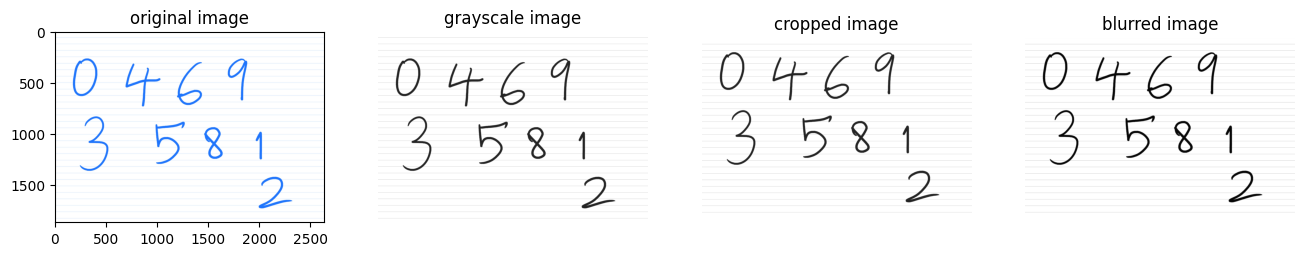

In [215]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = gray[120:,:]
blurred = cv2.GaussianBlur(cropped, (5, 5), 0)


#matplotlib inline
from matplotlib import cm
fig = plt.figure(figsize=(16,4))
ax = plt.subplot(1,4,1)
ax.imshow(image)
ax.set_title('original image');

ax = plt.subplot(1,4,2)
ax.imshow(gray,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('grayscale image');

ax = plt.subplot(1,4,3)
ax.imshow(cropped,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('cropped image');

ax = plt.subplot(1,4,4)
ax.imshow(blurred,cmap=cm.binary_r)
ax.set_axis_off()
ax.set_title('blurred image');
#plt.imshow(gray,cmap=cm.binary_r)

**We now use the OpenCV implementation of the Canny algorithm to detect the edges in the images, and the findContours function to find the contours of the characters. In this simple case, this is enough to segment the image and extract the single letters that we need to feed to the neural network for recognition.**

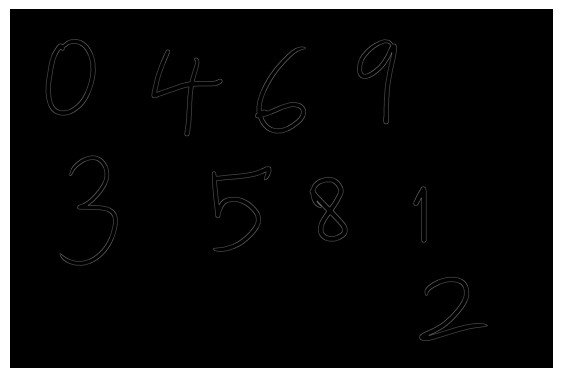

In [216]:
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 250) #low_threshold, high_threshold
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

figure = plt.figure(figsize=(7,7))
plt.axis('off');
plt.imshow(edged,cmap=cm.binary_r);

**Now we can isolate the letters by cycling over the contours and extracting their bounding boxes. These will be our regions of interest.**

**For each ROI we will then binarize the pixel values, using OTSU thresholding.**

**We will then resize each roi to fit the input dimension of our model. This is done by matching the largest dimension of the bounding box with the corrisponding dimension in the input shape, and padding the other dimension to match the correct shape. In this way, the image is resized conserving its orginal aspect ratio.**

**We will store the processed characters in a list called 'char', in which element is a tuple containing the image and the bounding box data (x,y,height,width).**

In [217]:
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and isolate ROI
  (x, y, w, h) = cv2.boundingRect(c)
  roi = cropped[y:y + h, x:x + w]

  #binarize image, finds threshold with OTSU method
  thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

  # resize largest dimension to input size
  (tH, tW) = thresh.shape
  if tW > tH:
    thresh = imutils.resize(thresh, width=28)
  # otherwise, resize along the height
  else:
    thresh = imutils.resize(thresh, height=28)

  # find how much is needed to pad
  (tH, tW) = thresh.shape
  dX = int(max(0, 28 - tW) / 2.0)
  dY = int(max(0, 28 - tH) / 2.0)
  # pad the image and force 28 x 28 dimensions
  padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
    left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
    value=(0, 0, 0))
  padded = cv2.resize(padded, (28, 28))
  # reshape and rescale padded image for the model
  padded = padded.astype("float32") / 255.0
  padded = np.expand_dims(padded, axis=-1)
  # append image and bounding box data in char list
  chars.append((padded, (x, y, w, h)))

**plot the isolated characters, to see if our segmentation worked well.**

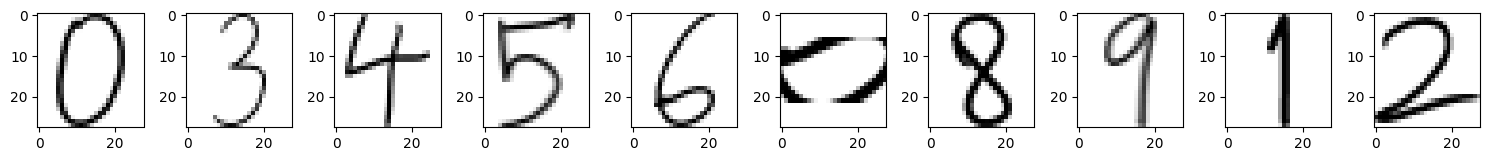

In [218]:
# plot isolated characters
n_cols = 10
n_rows = np.floor(len(chars)/ n_cols)+1
fig = plt.figure(figsize=(1.5*n_cols,1.5*n_rows))
for i,char in enumerate(chars):
  ax = plt.subplot(int(n_rows),n_cols,i+1)
  ax.imshow(char[0][:,:,0],cmap=cm.binary,aspect='auto')
  #plt.axis('off')
plt.tight_layout()

**Now we can use our model to predict the identity of each character.**

In [206]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)
# define the list of label names
labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"

1/1 [==============================] - 0s 28ms/step


**Now that we have queried the model for its predictions, and mapped them to their letter labels, we can plot them. The cell below cycles over the letters, and plots bounding boxes on top of the original image. Predicted labels and their confidence are plotted above the bounding box.**

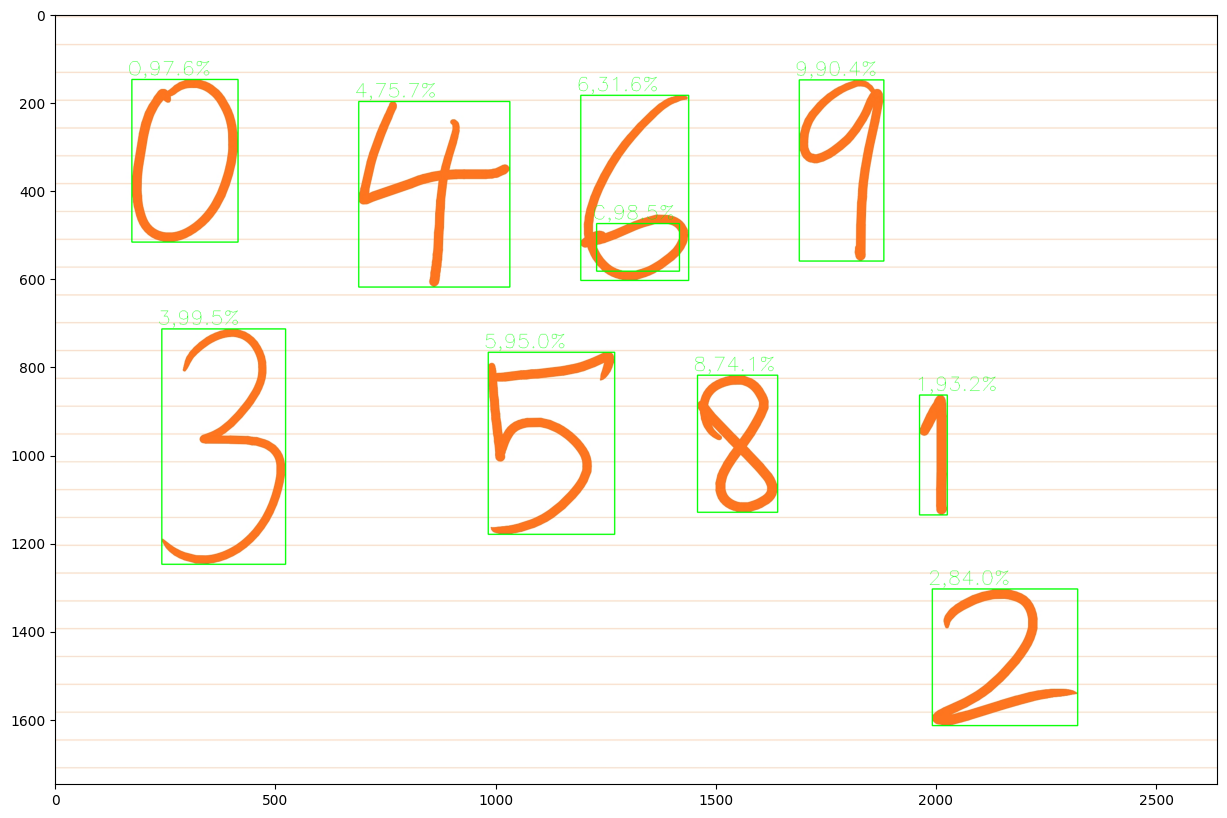

In [207]:
image = cv2.imread(image_path)
cropped = image[120:,:]

for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
  i = np.argmax(pred)
  prob = pred[i]
  label = labelNames[i]
  # draw the prediction on the image and it's probability
  label_text = f"{label},{prob * 100:.1f}%"
  cv2.rectangle(cropped, (x, y), (x + w, y + h), (0,255 , 0), 2)
  cv2.putText(cropped, label_text, (x - 10, y - 10),cv2.FONT_HERSHEY_SIMPLEX,1.5, (0,255, 0), 1)
# show the image
plt.figure(figsize=(15,10))
plt.imshow(cropped)

In [118]:
for x in labelNames:
  print(label)
  x+1

SyntaxError: ignored